In [1]:
import osmnx as ox
import datetime as dt
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import hashlib
import fiona as fn
import io
import json
import logging as lg
import math
import networkx as nx
import os
import re
import requests
import time
from IPython.display import Image
from collections import OrderedDict
from dateutil import parser as date_parser
from itertools import groupby
from shapely.geometry import LineString
from shapely.geometry import MultiPolygon
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import unary_union
from descartes import PolygonPatch
ox.config(log_console=True, use_cache=True)

In [8]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240
dpi = 240

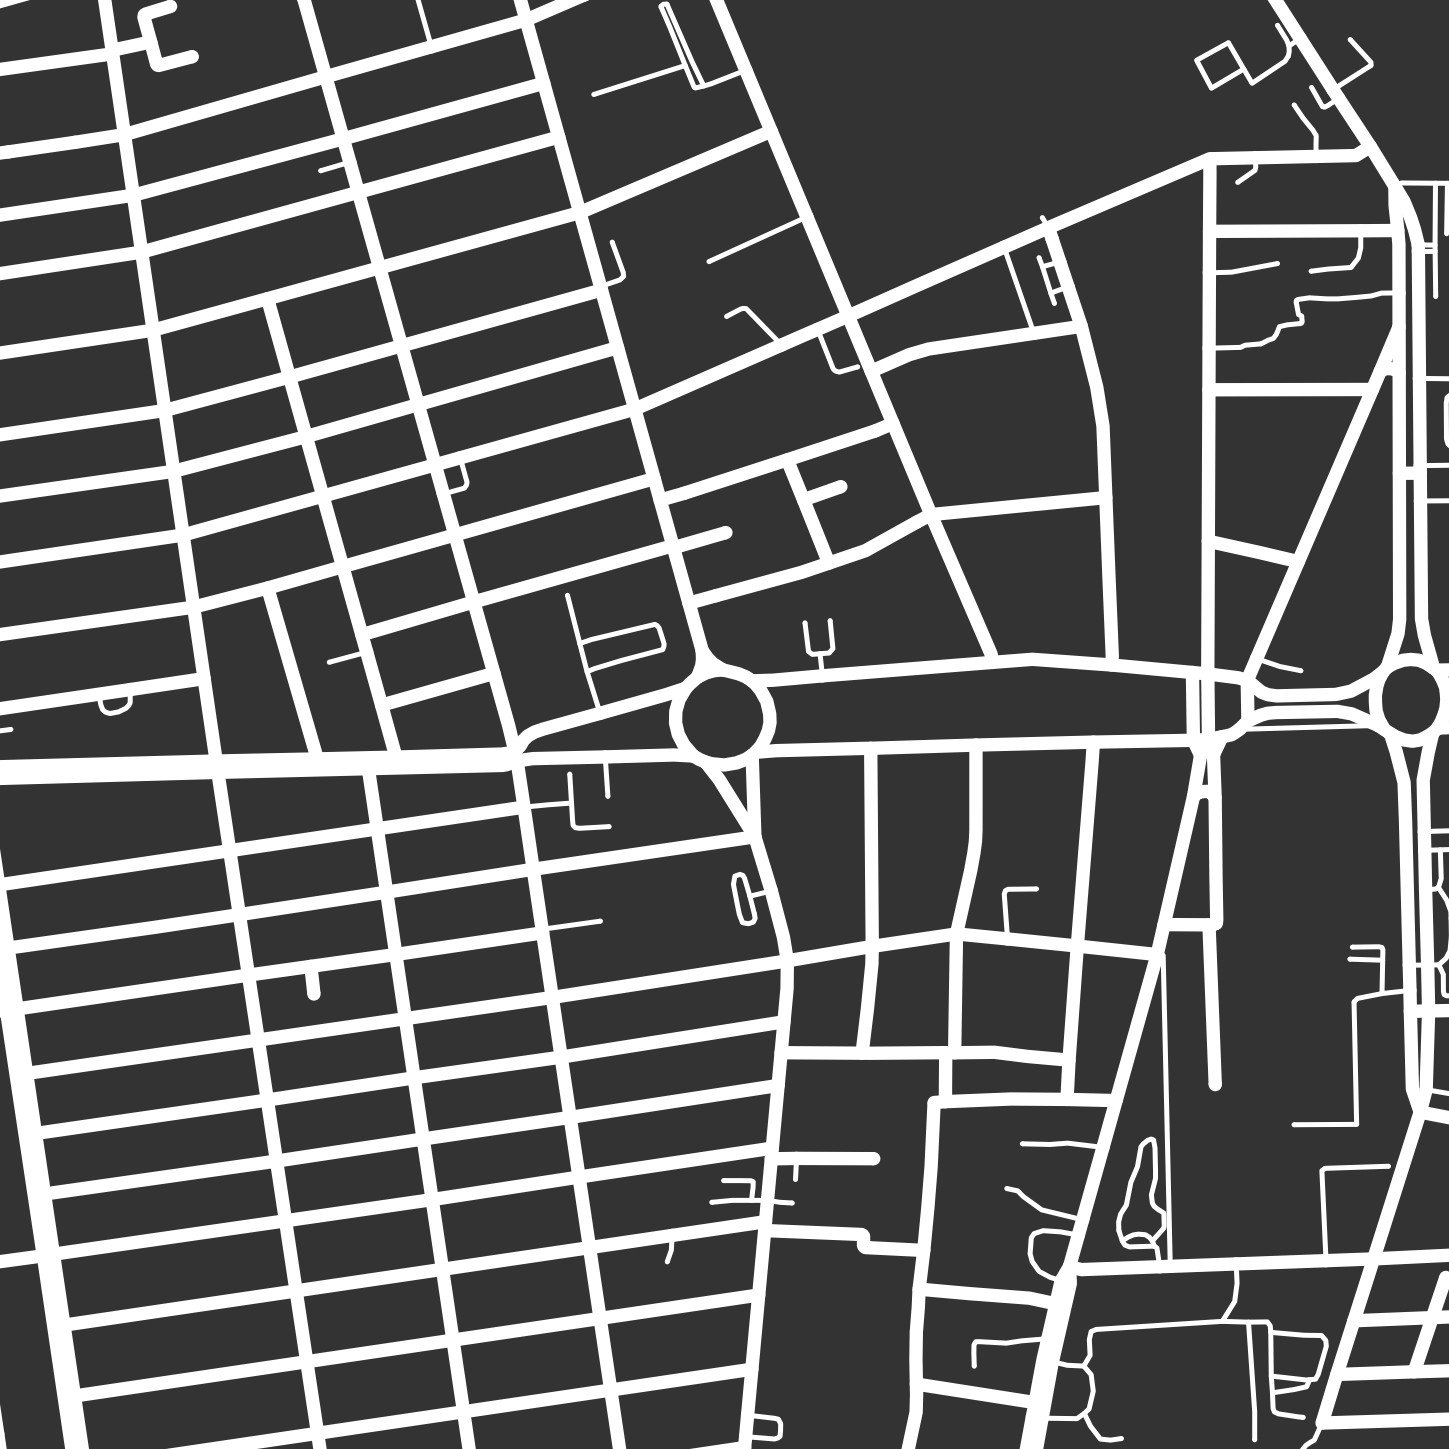

In [19]:
place = 'Phnom Penh'
point = (11.5563738, 104.92820989999996)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

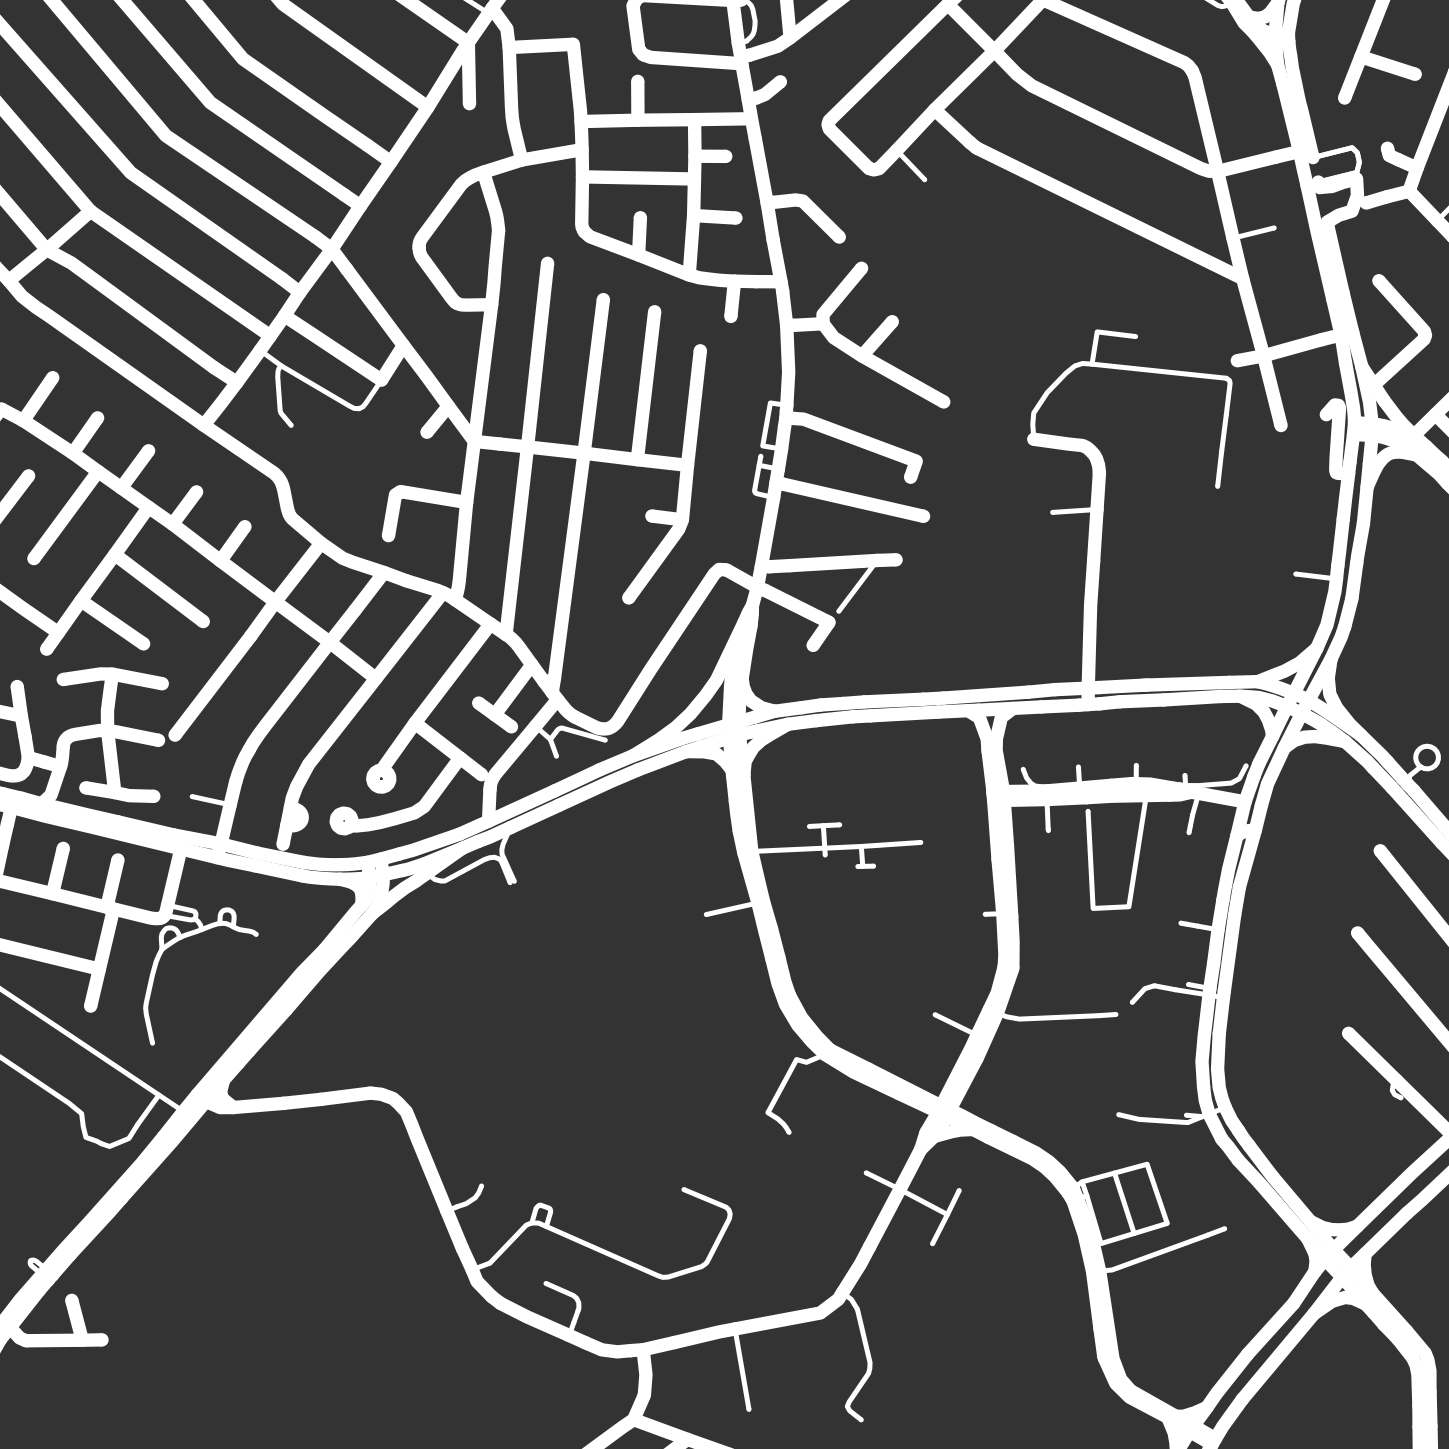

In [20]:
place = 'singapore'
point = (1.3553794,103.86774439999999)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

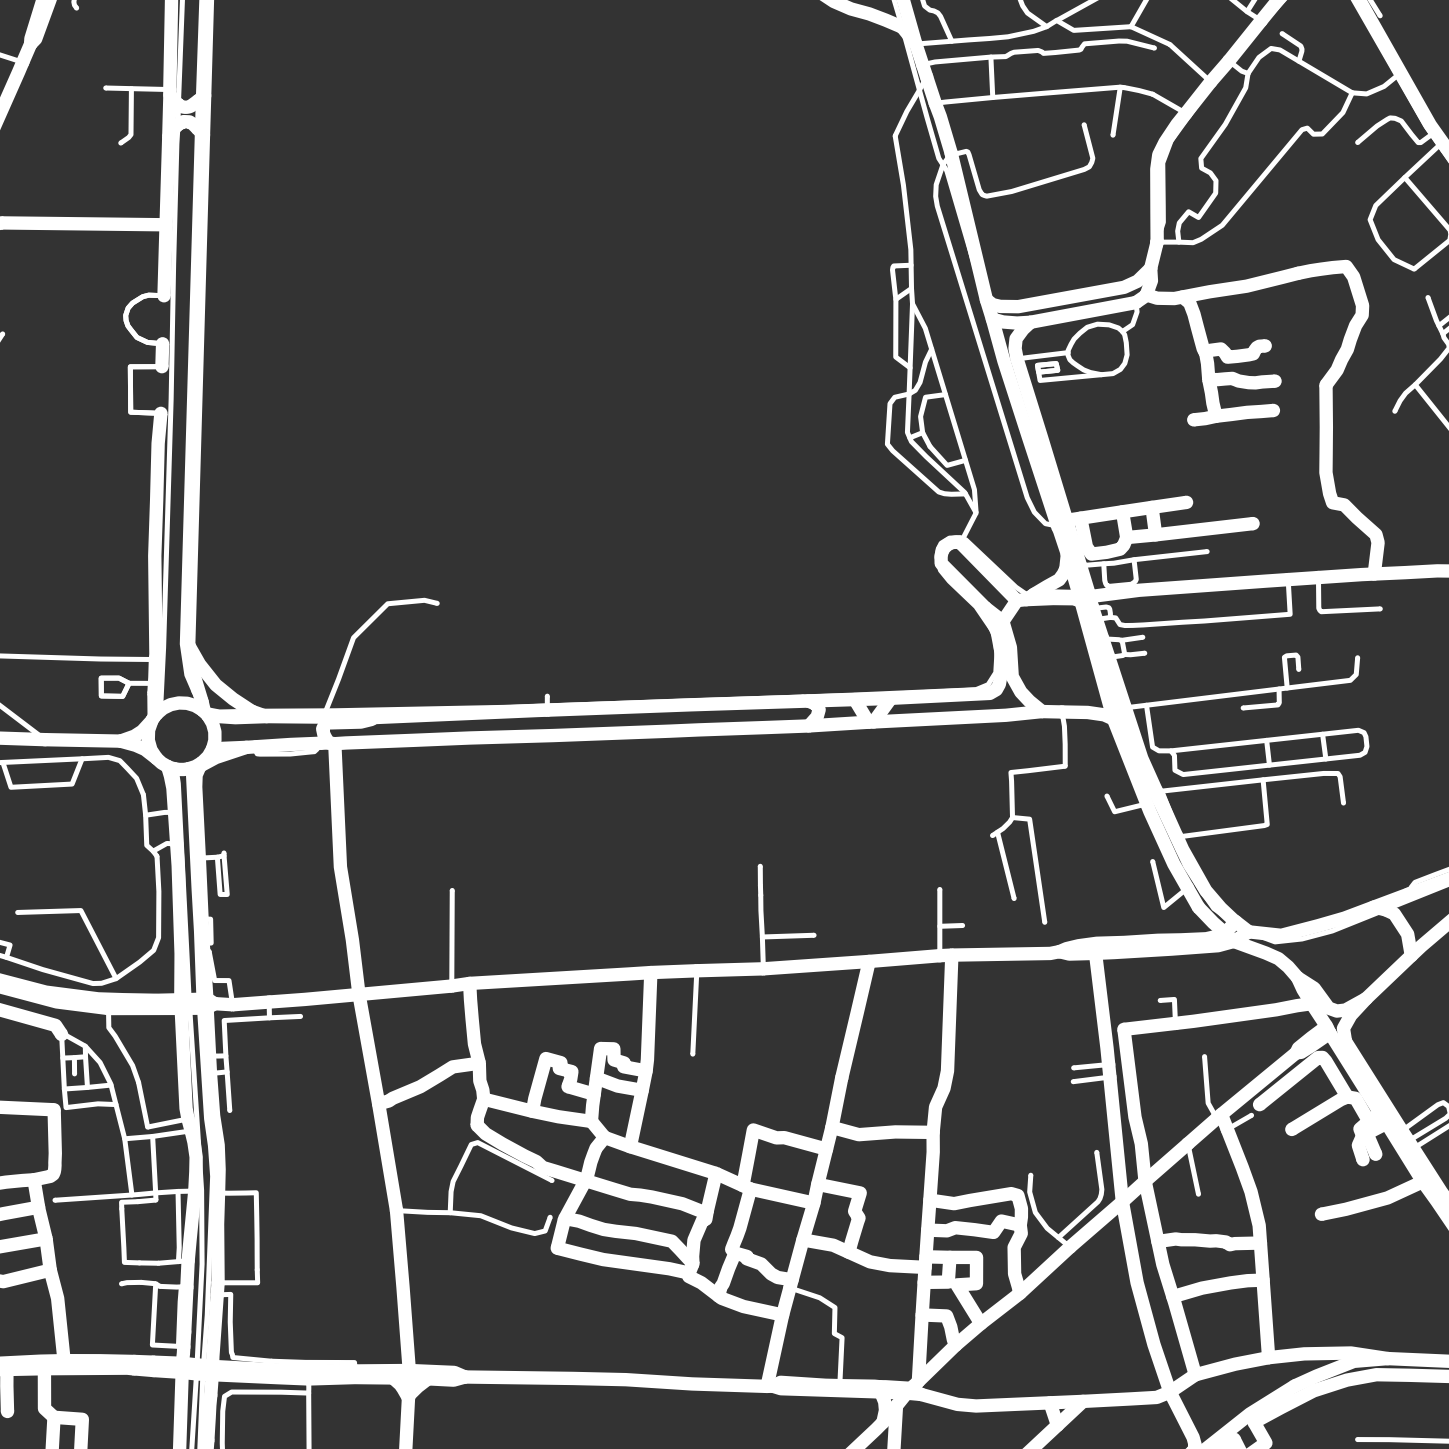

In [21]:
 place = 'Jakarta'
point = (-6.180495,106.82834149999996)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

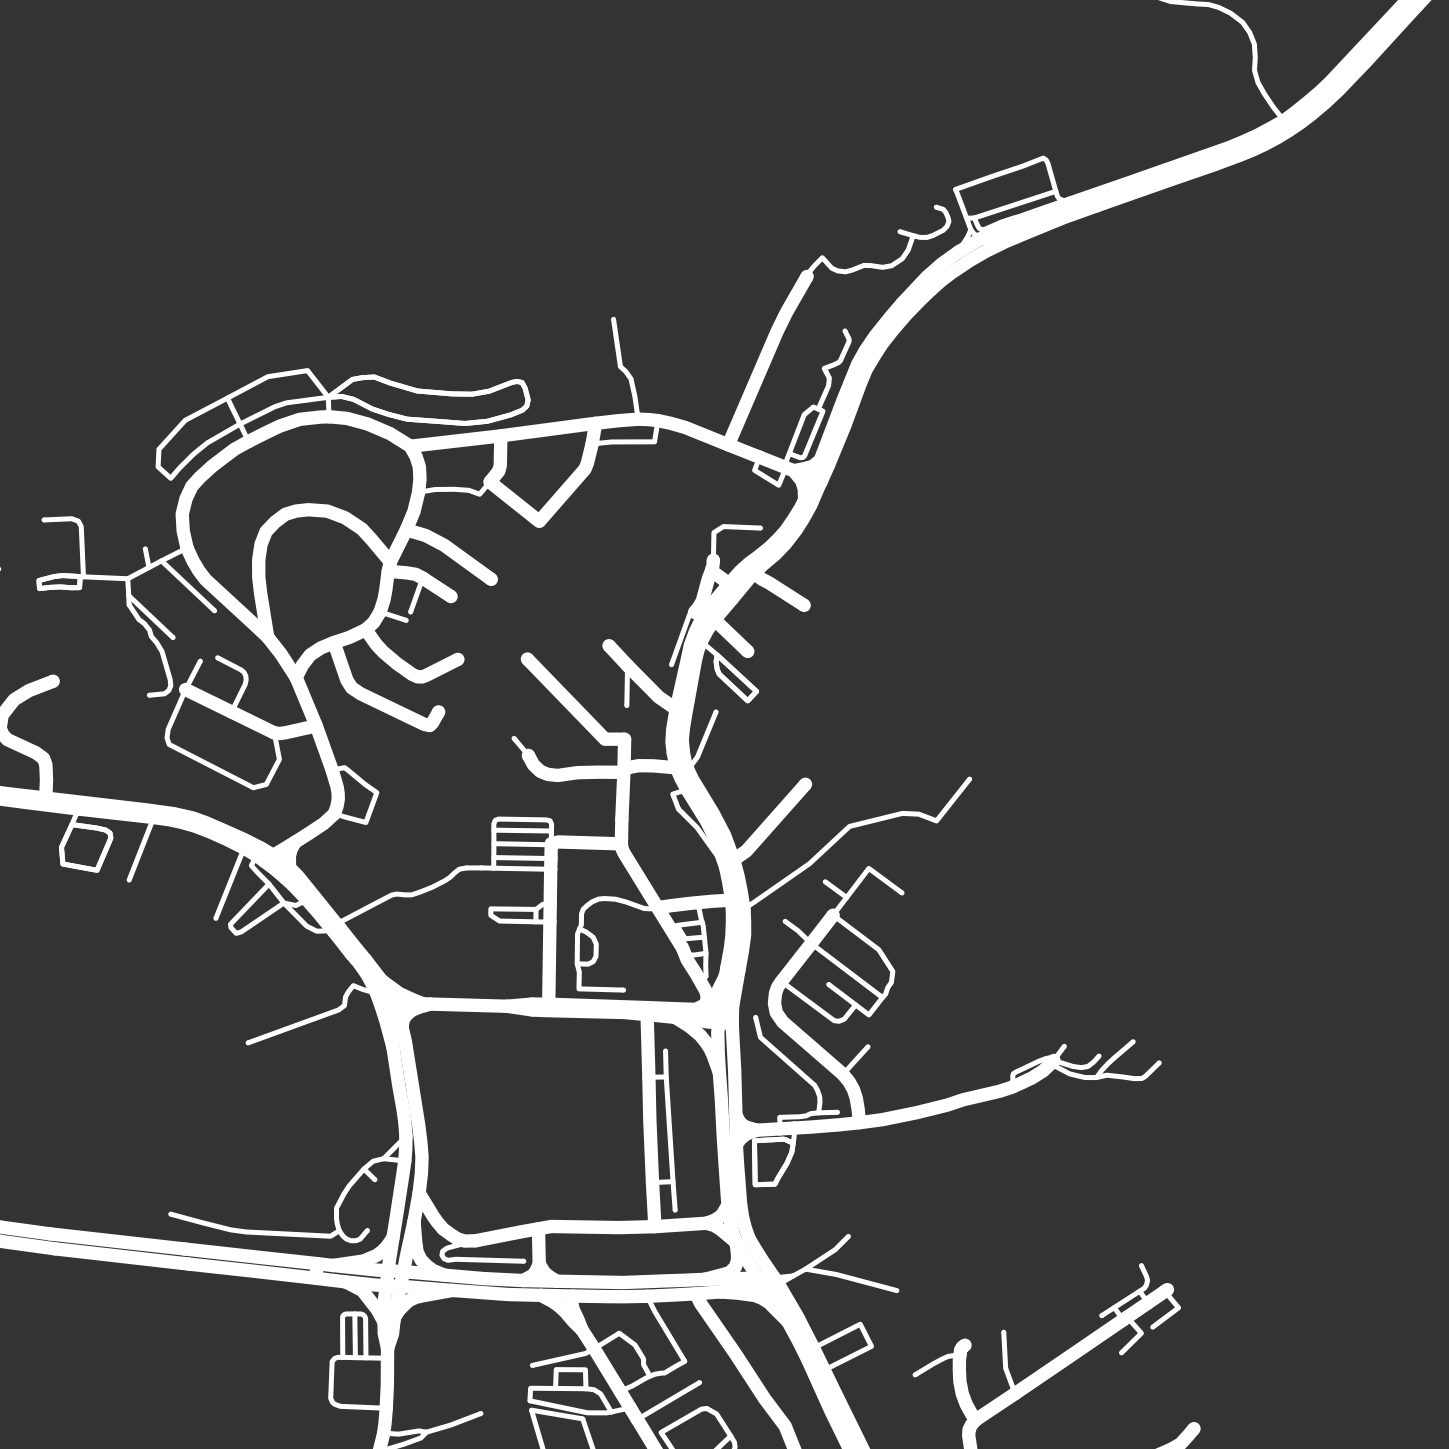

In [22]:
 place = 'Bandar'
point = (4.9030522,114.93982099999994)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

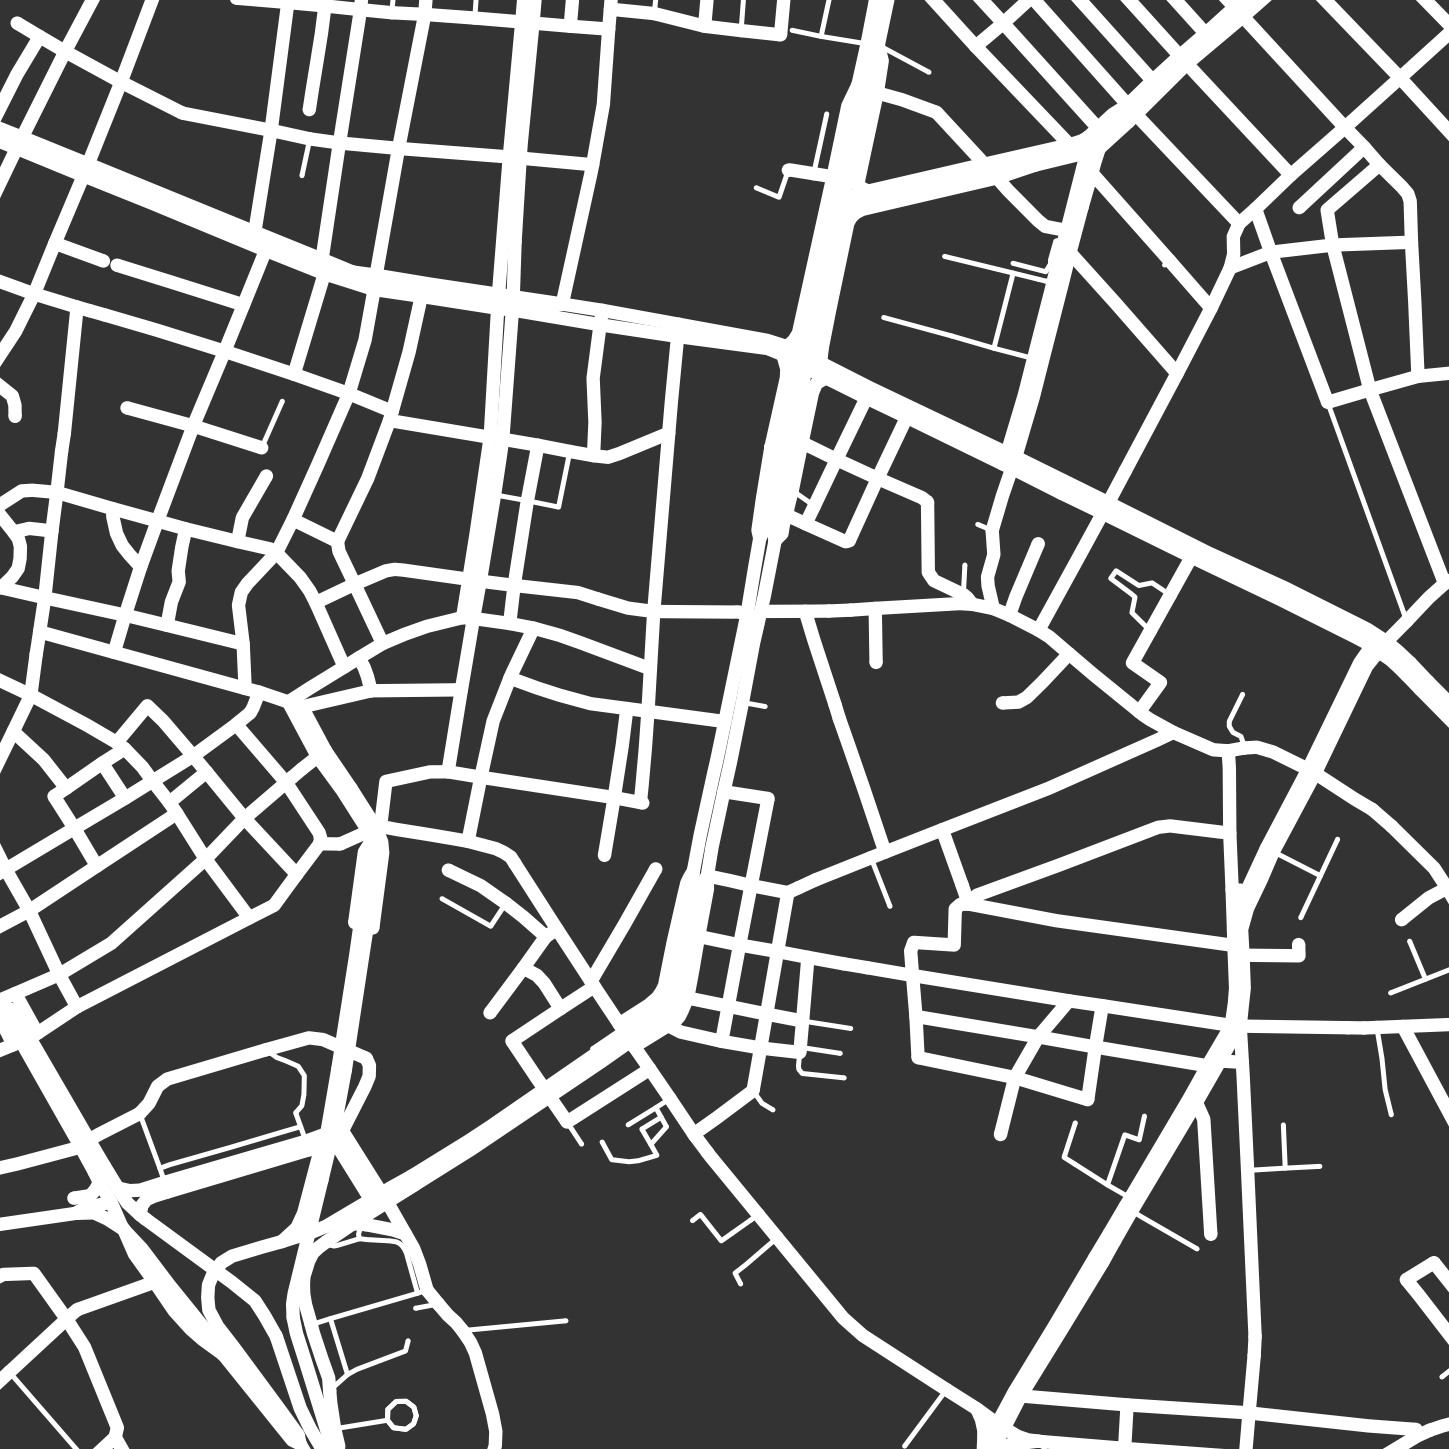

In [23]:
place = 'Manila'
point = (14.5995124,120.9842195)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

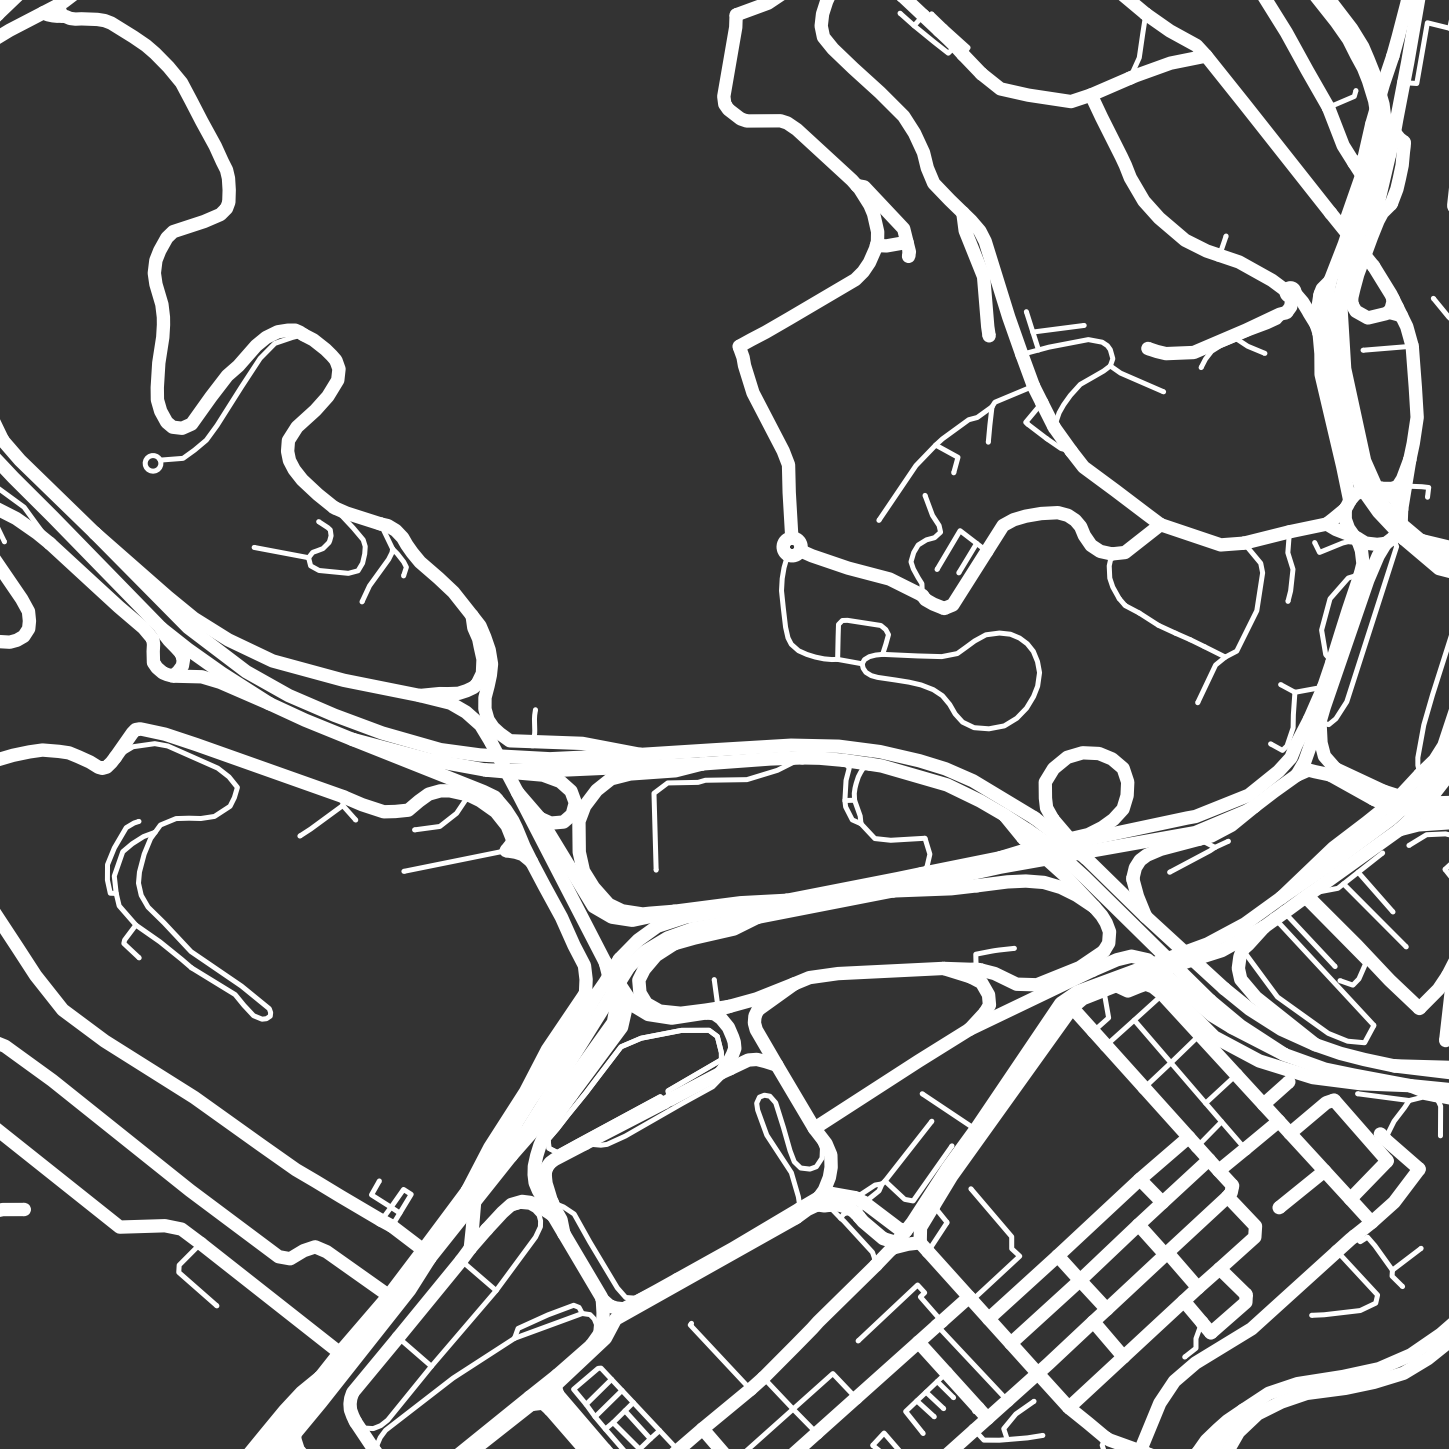

In [24]:
place = 'Kuala Lumpur'
point = (3.139003,101.68685499999992)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

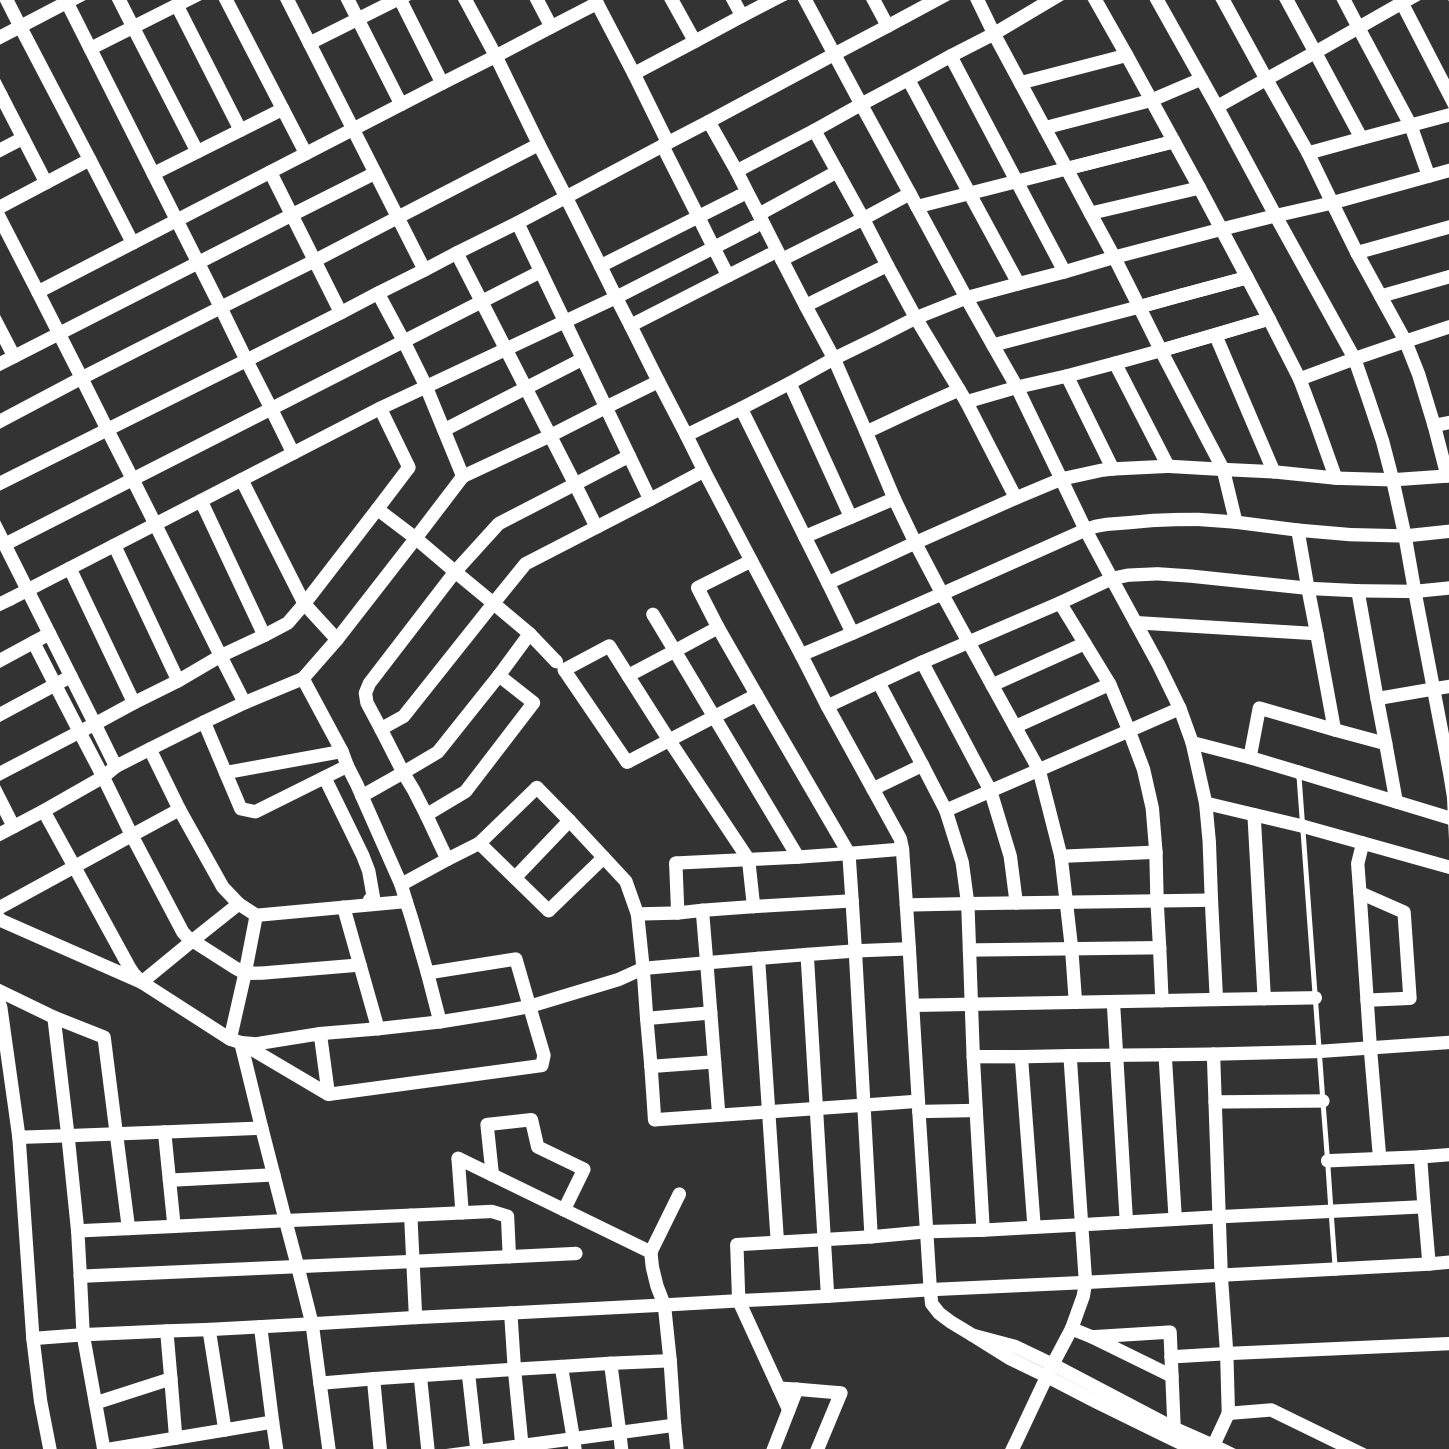

In [25]:
place = 'Yongon'
point = (16.8661, 96.1951)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

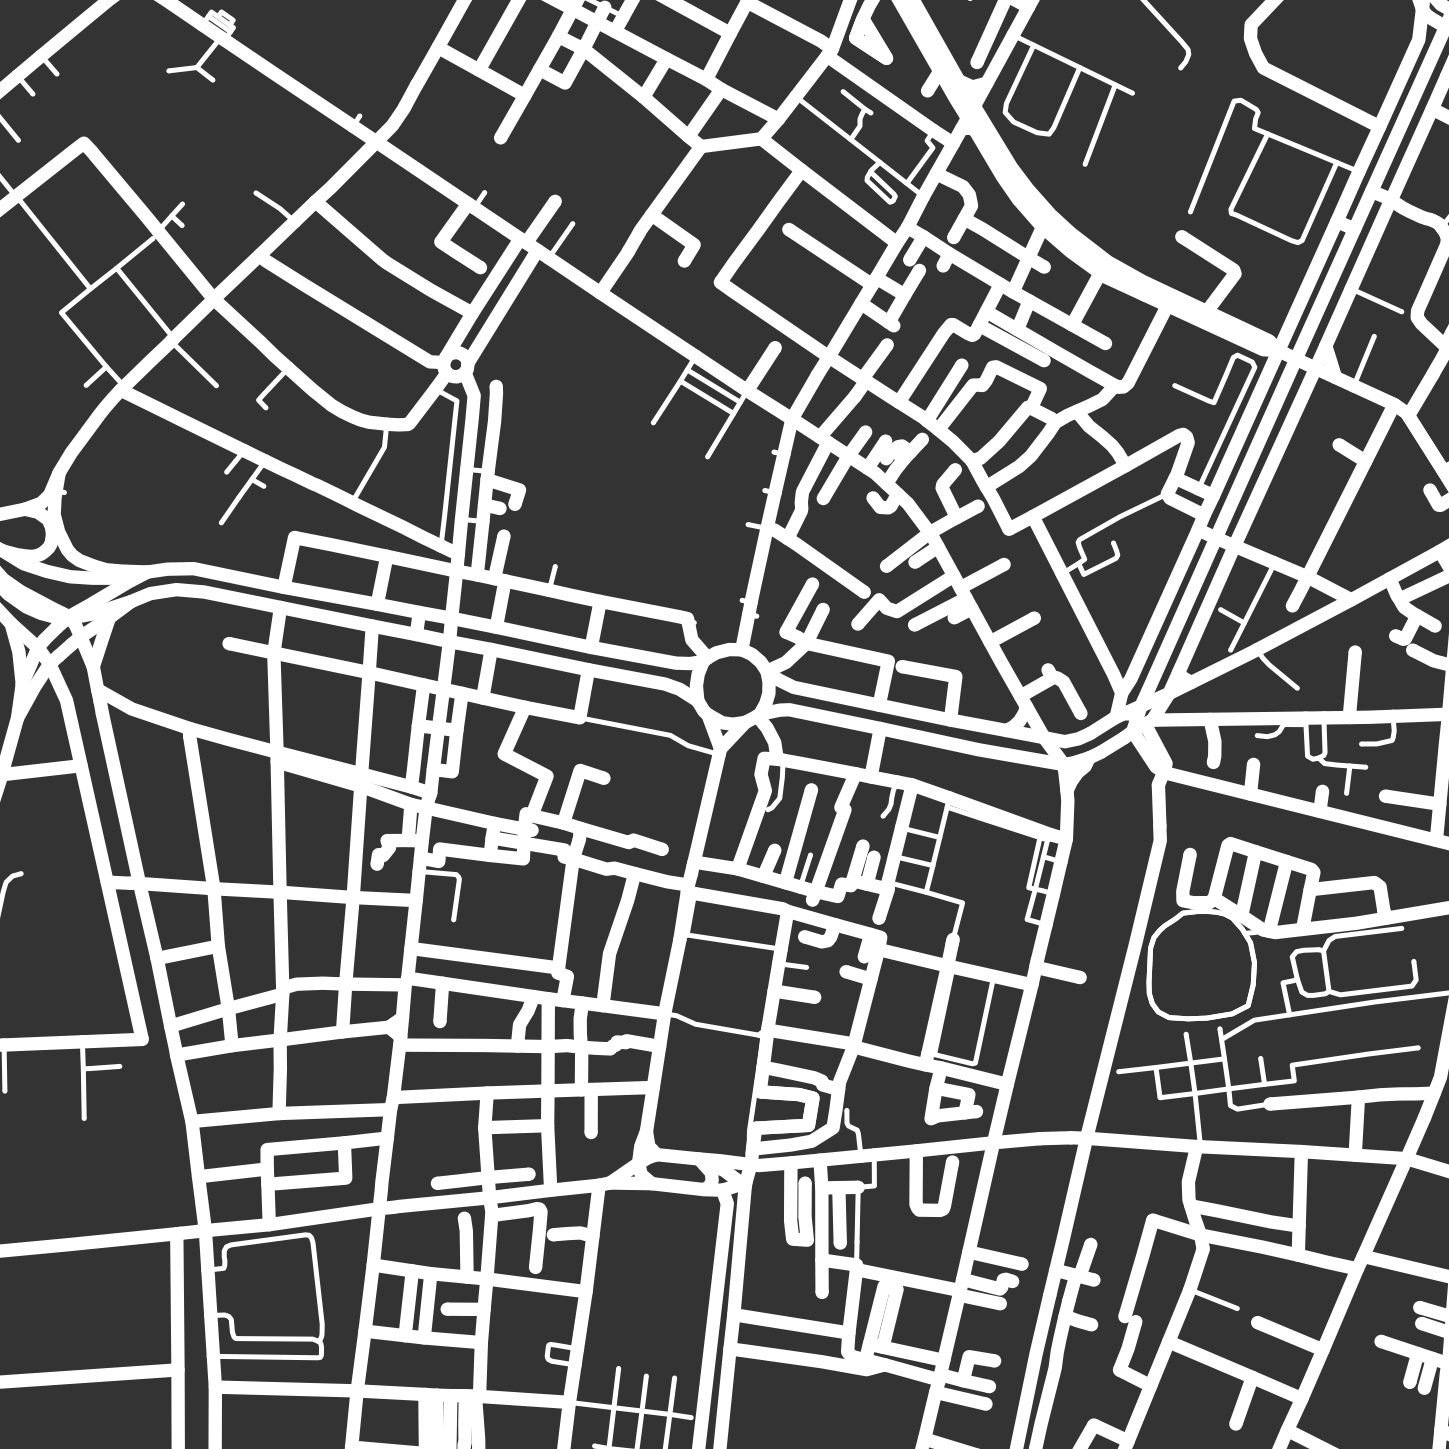

In [26]:
place = 'Bangkok'
point = (13.7563309, 100.50176510000006)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

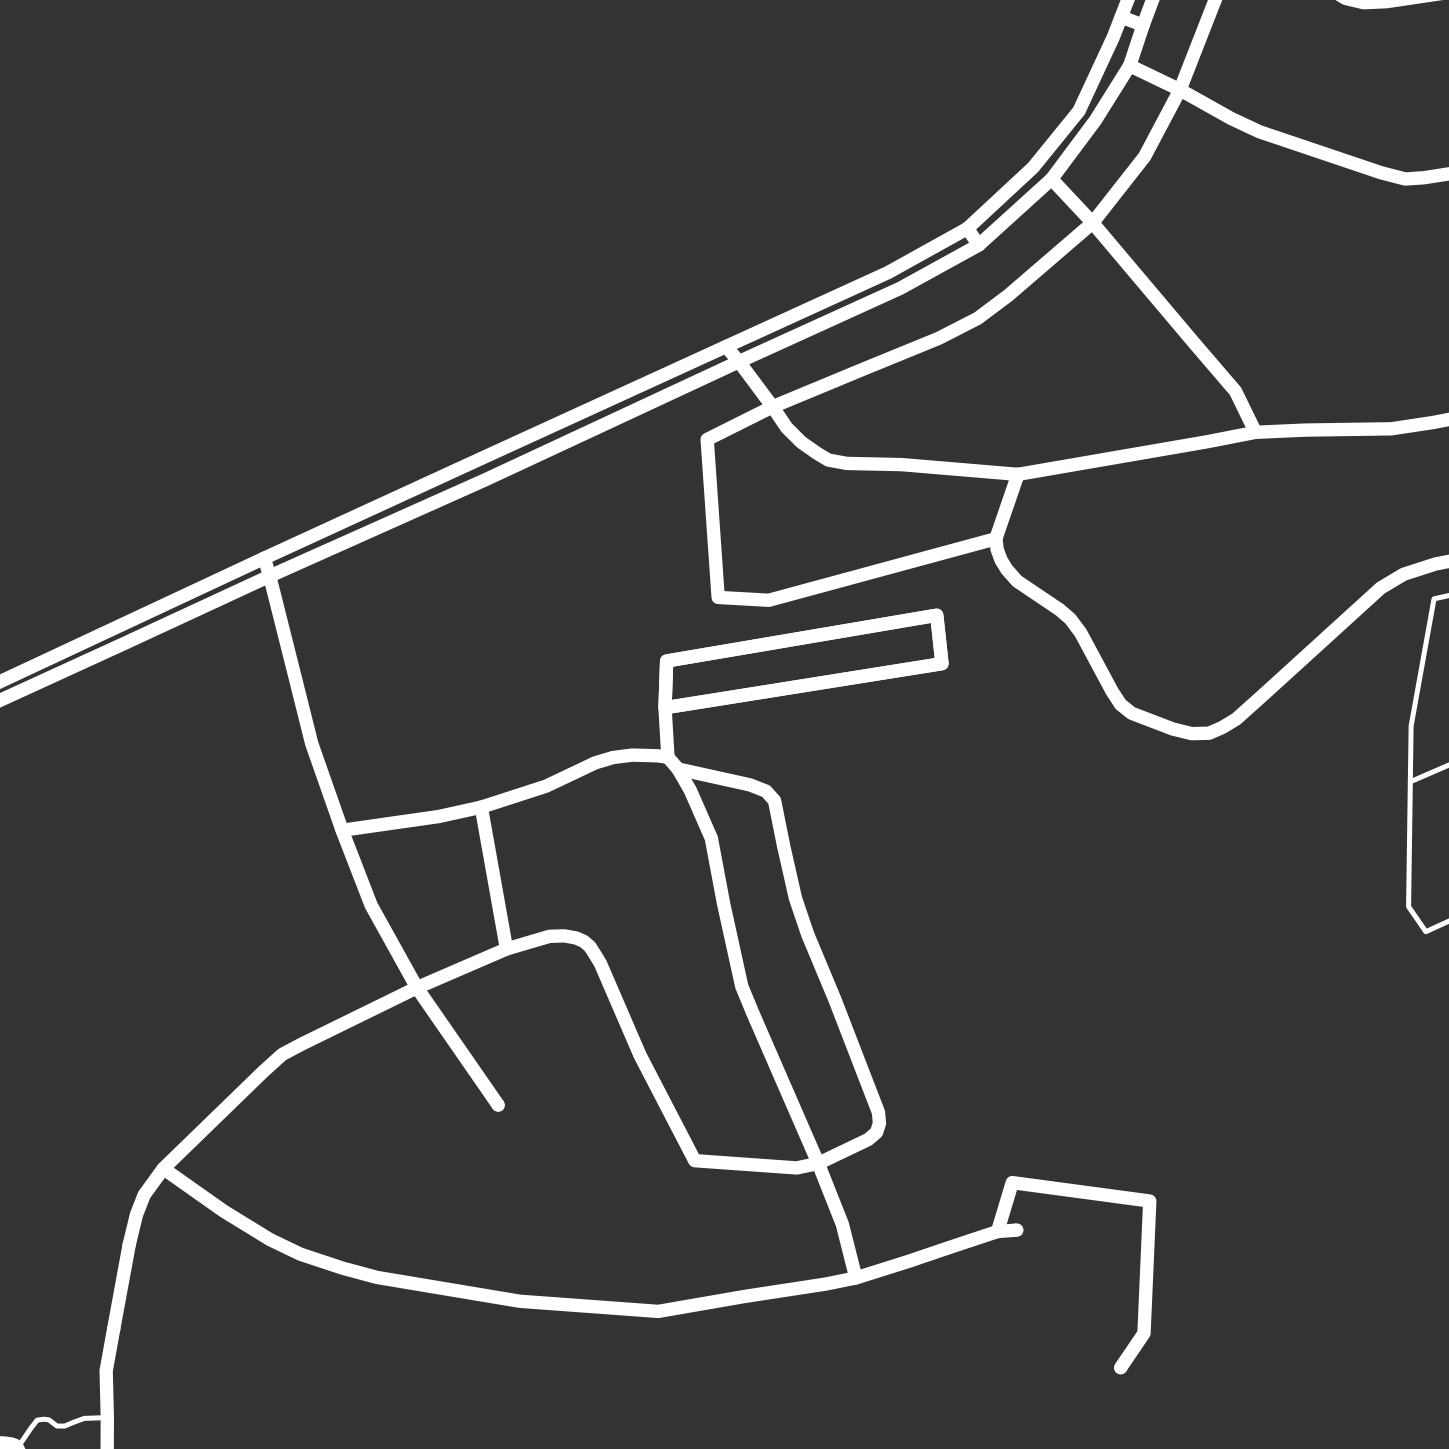

In [9]:
place = 'Naypyidaw'
point = (19.7540045,96.1344976)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

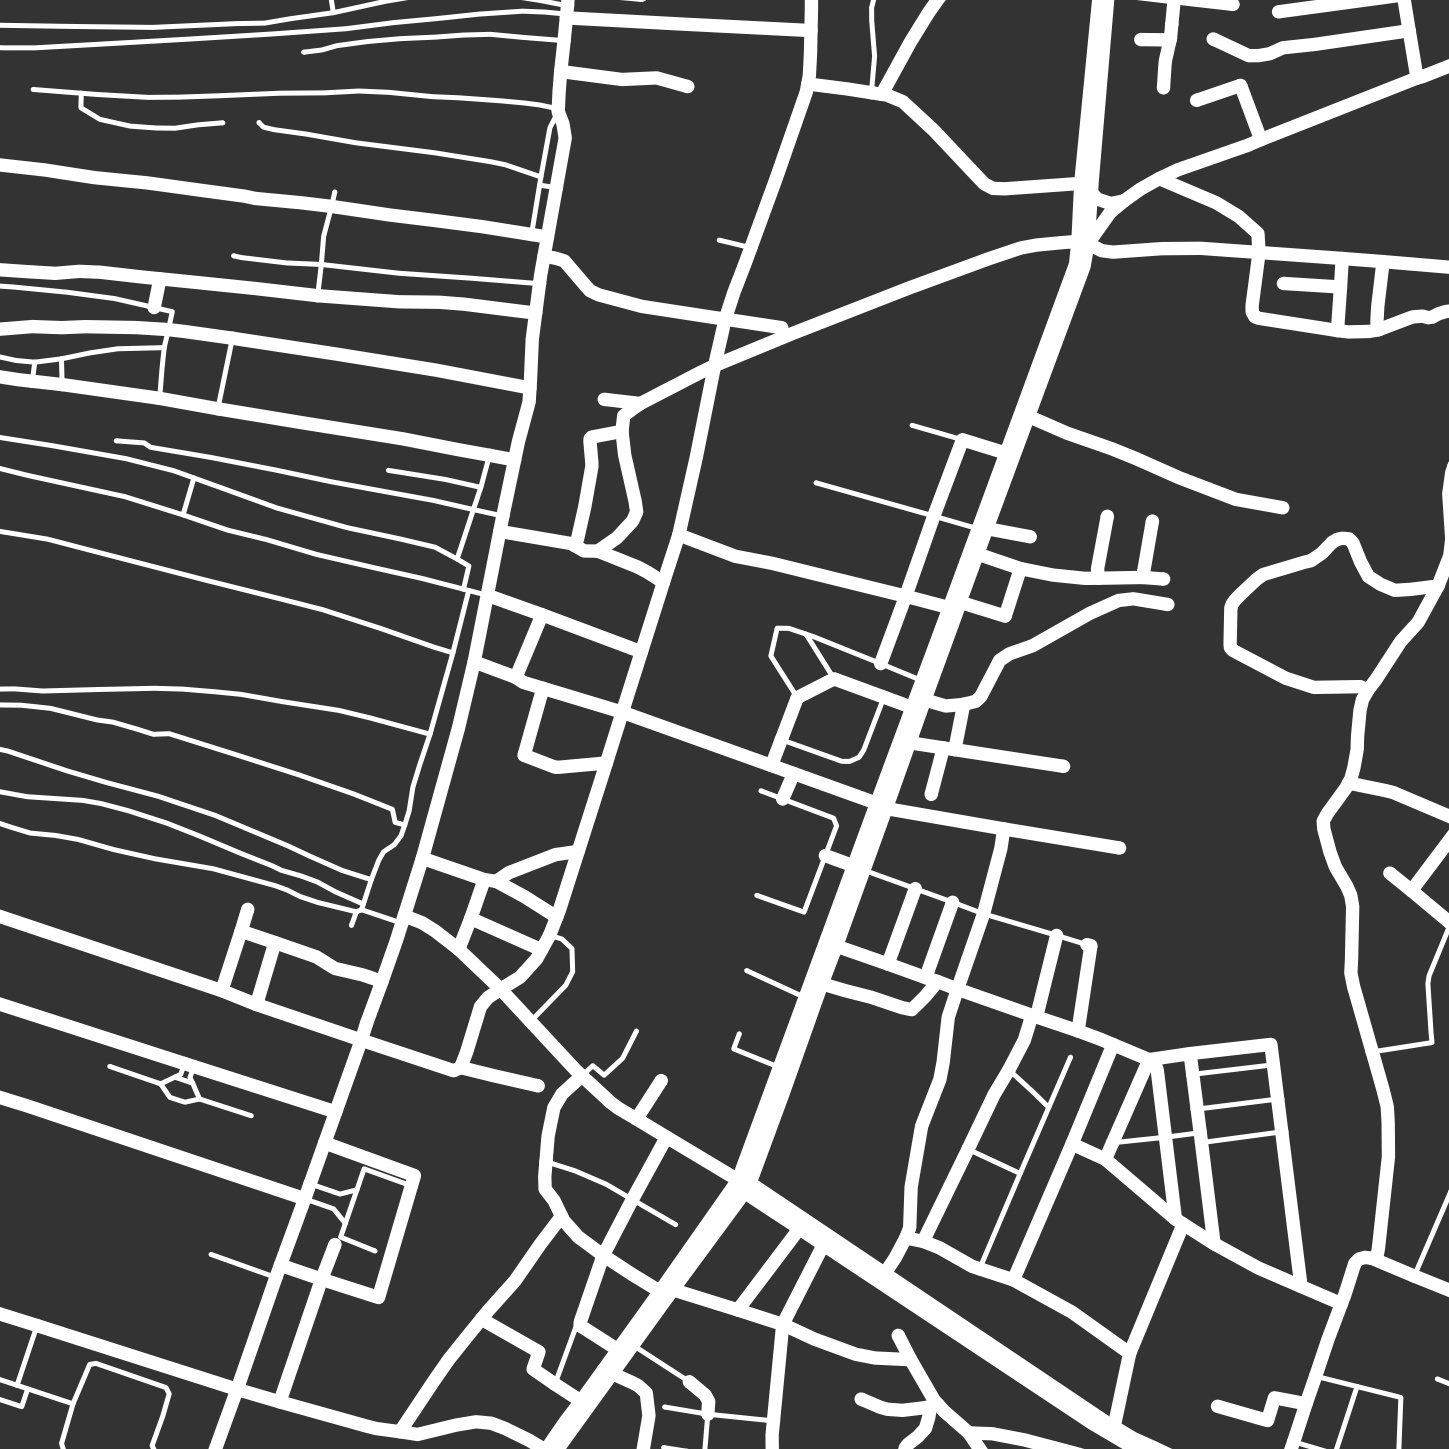

In [10]:
place = 'Chonburi'
point = (13.3658434,100.9889619)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [31]:
address = 'Manila, Philippines'
gdf = ox.gdf_from_place(address)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place('Manila, Philippines',which_result=2, network_type='drive')

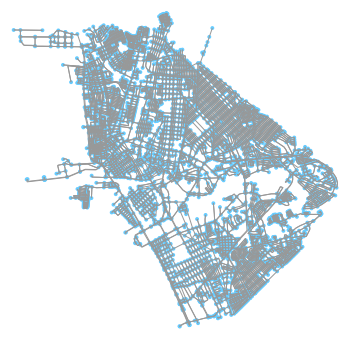

In [32]:
# Get Edges and Nodes
graph_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(graph_proj)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

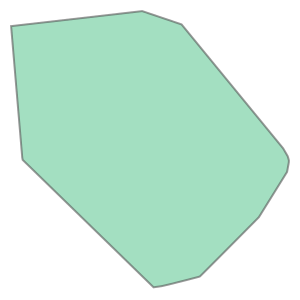

In [33]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [34]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   5385
m                                                                                  14797
k_avg                                                                            5.49564
intersection_count                                                                  4879
streets_per_node_avg                                                             3.17456
streets_per_node_counts                {0: 0, 1: 506, 2: 20, 3: 2938, 4: 1876, 5: 39,...
streets_per_node_proportion            {0: 0.0, 1: 0.09396471680594243, 2: 0.00371402...
edge_length_total                                                            1.27847e+06
edge_length_avg                                                                  86.4008
street_length_total                                                               749063
street_length_avg                                                                88.2185
street_segments_count

In [35]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

(191593252, 0.13172323879397096)

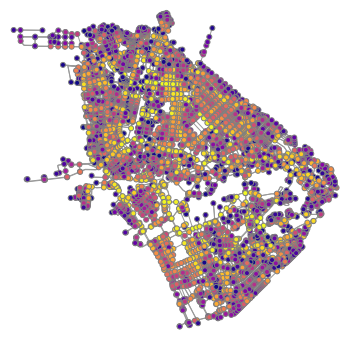

In [38]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=25, node_zorder=2)

In [39]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

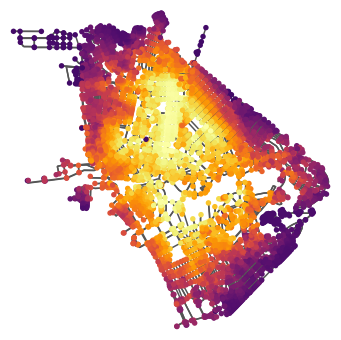

In [40]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

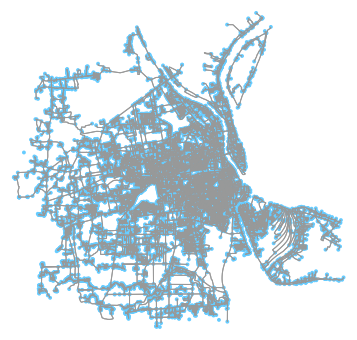

In [42]:
#Download drivable street network for "Phnom Penh, Cambodia" 
places = 'Phnom Penh, Cambodia'
G = ox.graph_from_place(places, network_type='drive', retain_all=True)
graph_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(graph_proj)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
#save graph to disk as shapefile
ox.save_graph_shapefile(G, filename='Phnom Penh_drivable routes')

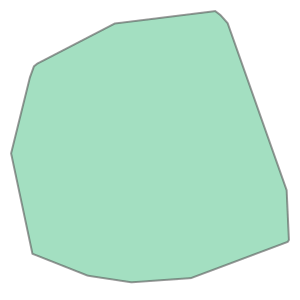

In [43]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [ ]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

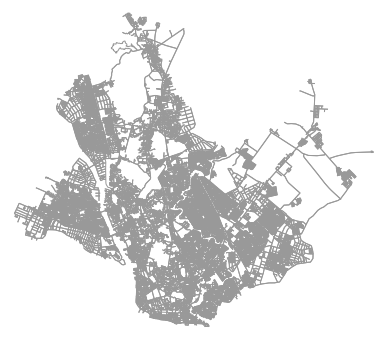

In [2]:
G = ox.graph_from_place('Yangon, Myanmar',which_result=2, network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [3]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Yangon_drive')

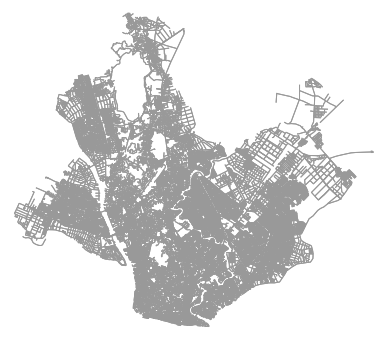

In [4]:
G = ox.graph_from_place('Yangon, Myanmar',which_result=2, network_type='walk')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [5]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Yangon_walk')

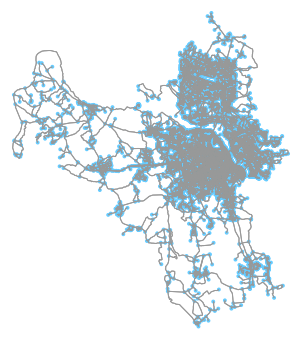

In [11]:
# you can also create a network with a buffer distance (meters) around the place
G = ox.graph_from_place('Hanoi, Vietnam', network_type='drive', buffer_dist=200)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


In [12]:
ox.save_graph_shapefile(G, filename='Hanoi_drive')

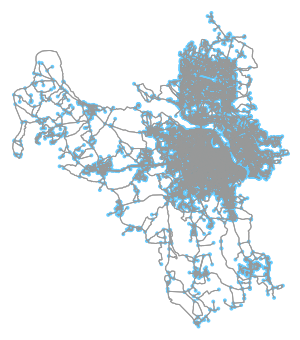

In [13]:
# you can also create a network with a buffer distance (meters) around the place
G = ox.graph_from_place('Hanoi, Vietnam', network_type='walk', buffer_dist=200)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


In [14]:
ox.save_graph_shapefile(G, filename='Hanoi_walk')

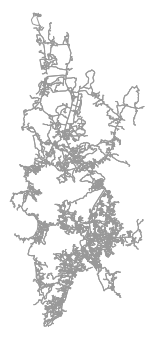

In [15]:
G = ox.graph_from_place('Phuket, Thailand', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [16]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Phuket_drive')

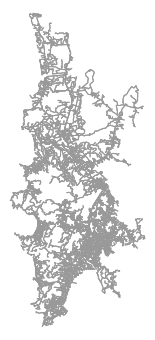

In [17]:
G = ox.graph_from_place('Phuket, Thailand', network_type='walk')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [18]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Phuket_walk')

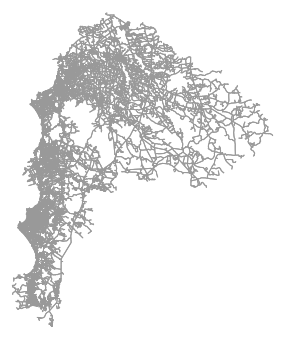

In [19]:
G = ox.graph_from_place('Chonburi, Thailand', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [20]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Chonburi_drive')

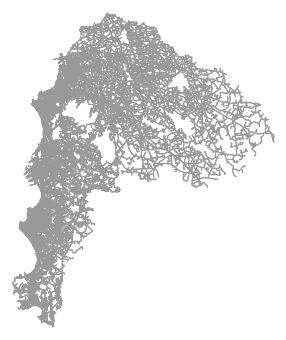

In [39]:
G = ox.graph_from_place('Chonburi, Thailand', network_type='walk')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [40]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Chonburi_walk')

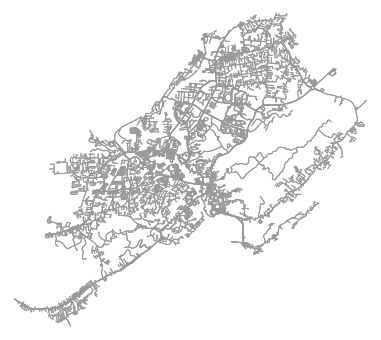

In [26]:
G = ox.graph_from_place('Bandar Seri Begawan, Brunei',which_result=2, network_type='walk')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

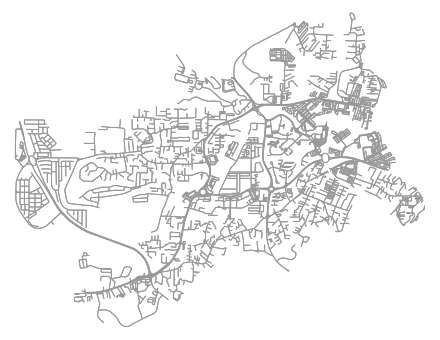

In [27]:
G = ox.graph_from_place('Gadong, Brunei',which_result=2, network_type='walk')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [28]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Gadong, Brunei_walk')

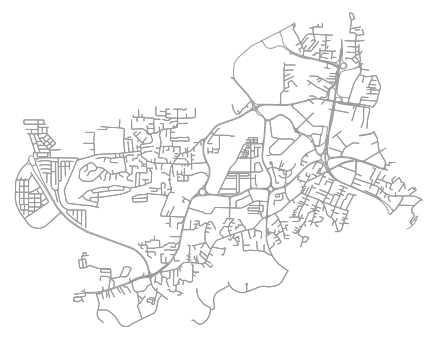

In [29]:
G = ox.graph_from_place('Gadong, Brunei',which_result=2, network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [30]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='Polar_Gadong, Brunei_drive')

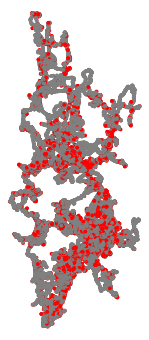

In [2]:
#visualize all the cul-de-sacs (or intersections of any other type) in a city to get a sense of these points of low network connectivity
# We can visualize all the cul-de-sacs for all networks
place = "Phuket"
G = ox.graph_from_place(place, network_type='drive',simplify=False)
nc = ['r' if ox.is_endpoint(G, node) else 'grey' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

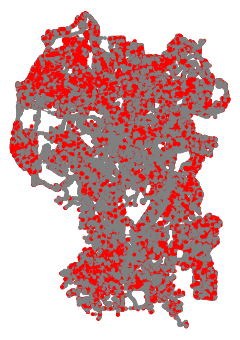

In [4]:
#visualize all the cul-de-sacs (or intersections of any other type) in a city to get a sense of these points of low network connectivity
# We can visualize all the cul-de-sacs for all networks
place = "Kuala Lumpur"
G = ox.graph_from_place(place, network_type='drive',simplify=False)
nc = ['r' if ox.is_endpoint(G, node) else 'grey' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

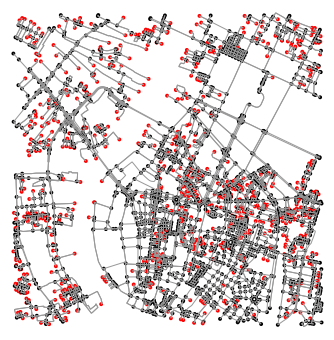

(<Figure size 437.129x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f8aaa91f60>)

In [6]:
#visualize all the cul-de-sacs (or intersections of any other type) in a city to get a sense of these points of low network connectivity
#Bangkok
G = ox.graph_from_address('13.7563309, 100.50176510000006, Thailand', distance=2500, network_type='drive')
culdesacs = [key for key, value in G.graph['streets_per_node'].items() if value==1]
nc = ['r' if node in culdesacs else 'none' for node in G.nodes()]
ox.plot_graph(G, node_color=nc)